## Import modules

In [1]:
from arcgis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import csv

%matplotlib inline

## Create data lists from a csv file

In [2]:
#create lists with data from a csv file
ecos = []
data = []

with open(r"C:\Users\bputra\OneDrive - ESRI Indonesia\PT ESRI Indonesia\Research\code-script\22_arcgis_for_python_study\belajar_arcgis_for_python\VisualPythonAPI\VisualPythonAPI\AcresBurned_by_Ecoregion_and_Month.csv", newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    row1 = next(reader)
    months = row1
    months.remove('')
    
    
    #add names of ecoregions in the first column to the list 'ecos'    
    for row in reader:
        ecos.append(row[0])
        row_item = []
        
        #for each ecoregion add the acres burned value for each month to the list 'data'
        for i in range(1, 13):
            row_item.append(float(row[i]))          
        data.append(row_item)
print(ecos)
print(months)
print(data)


['Eastern Temperate Forests', 'Great Plains', 'Marine West Coast Forest', 'Mediterranean California', 'North American Deserts', 'Northern Forests', 'Northwestern Forested Mountains', 'Southern Semiarid Highlands', 'Temperate Sierras', 'Tropical Wet Forests']
['January', 'Februray', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
[[1102066.0, 1968605.0, 3191276.0, 2395261.0, 1094900.0, 512442.0, 452313.0, 187822.0, 297940.0, 191624.0, 392685.0, 301729.0], [659598.0, 1182902.0, 5146538.0, 10974668.0, 2575970.0, 1137977.0, 2084286.0, 1786083.0, 392567.0, 283398.0, 270538.0, 184345.0], [0.0, 0.0, 0.0, 0.0, 3642.0, 41161.0, 18578.0, 9687.0, 26822.0, 0.0, 0.0, 0.0], [6028.0, 20451.0, 8253.0, 18581.0, 205079.0, 689272.0, 1297319.0, 670162.0, 643144.0, 1517156.0, 62418.0, 307952.0], [38038.0, 40801.0, 109641.0, 699565.0, 423612.0, 3185764.0, 8790229.0, 6035736.0, 1281019.0, 138277.0, 18797.0, 11194.0], [5491.0, 0.0, 24267.0, 198929.0, 176037.0

In [13]:
# Divide the acres burned by 1000 so the numbers fit better on the chart
data_formatted = []
for list_item in data:
    formatted_row = [round(x/1000) for x in list_item]
    data_formatted.append(formatted_row)

#create a NumPy array from the data_formatted list
data_array = np.array(data_formatted) 

In [16]:
data_array

array([[ 1102,  1969,  3191,  2395,  1095,   512,   452,   188,   298,
          192,   393,   302],
       [  660,  1183,  5147, 10975,  2576,  1138,  2084,  1786,   393,
          283,   271,   184],
       [    0,     0,     0,     0,     4,    41,    19,    10,    27,
            0,     0,     0],
       [    6,    20,     8,    19,   205,   689,  1297,   670,   643,
         1517,    62,   308],
       [   38,    41,   110,   700,   424,  3186,  8790,  6036,  1281,
          138,    19,    11],
       [    5,     0,    24,   199,   176,     9,    35,   105,    17,
           41,     1,     0],
       [    9,     5,    34,    48,   245,  2750,  8572,  8374,  1167,
          262,    13,    57],
       [    2,    17,   100,   137,   536,   666,    70,    21,     0,
            6,     0,     2],
       [    2,    20,    59,   295,  1702,  2032,   497,   153,    69,
           69,    57,    12],
       [  135,   130,    97,   172,   324,   156,    41,    77,     6,
            5,    30

In [17]:
data_formatted

[[1102, 1969, 3191, 2395, 1095, 512, 452, 188, 298, 192, 393, 302],
 [660, 1183, 5147, 10975, 2576, 1138, 2084, 1786, 393, 283, 271, 184],
 [0, 0, 0, 0, 4, 41, 19, 10, 27, 0, 0, 0],
 [6, 20, 8, 19, 205, 689, 1297, 670, 643, 1517, 62, 308],
 [38, 41, 110, 700, 424, 3186, 8790, 6036, 1281, 138, 19, 11],
 [5, 0, 24, 199, 176, 9, 35, 105, 17, 41, 1, 0],
 [9, 5, 34, 48, 245, 2750, 8572, 8374, 1167, 262, 13, 57],
 [2, 17, 100, 137, 536, 666, 70, 21, 0, 6, 0, 2],
 [2, 20, 59, 295, 1702, 2032, 497, 153, 69, 69, 57, 12],
 [135, 130, 97, 172, 324, 156, 41, 77, 6, 5, 30, 24]]

## Create a heatmap

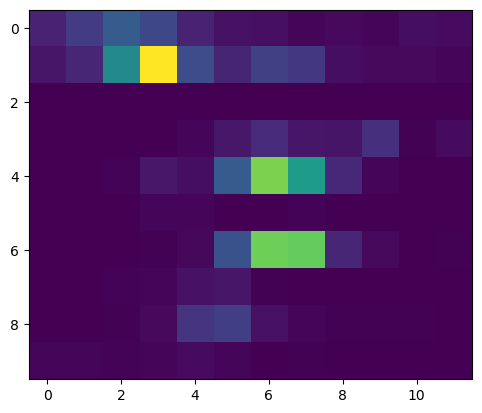

In [19]:
# Create the chart
fig, ax = plt.subplots()

# Plot the data_array
im = ax.imshow(data_array)
plt.show()

## Update the chart size and color map

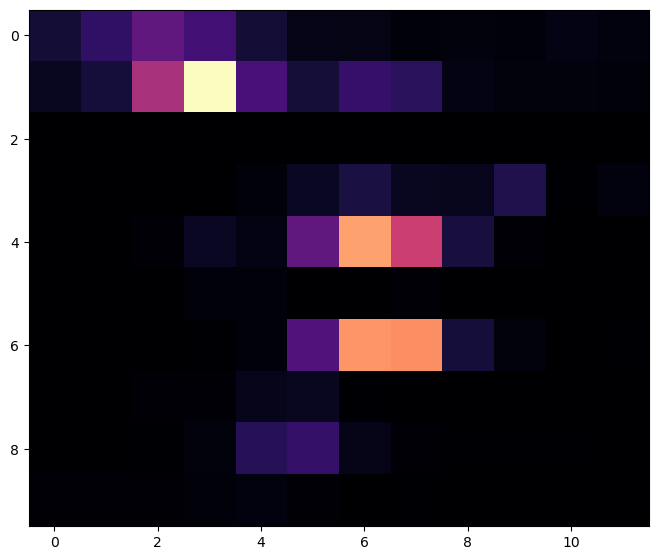

In [20]:
# Create the chart item and plot the array
fig, ax = plt.subplots()
im = ax.imshow(data_array)

# Set chart size to a square 8 inches by 8 inches.
fig.set_size_inches(8, 8)

# Plot the data_array with a specific colormap
im = ax.imshow(data_array, cmap= 'magma'   ) #add code to assign a specific colormap
plt.show()

## Add text annotations and save the chart

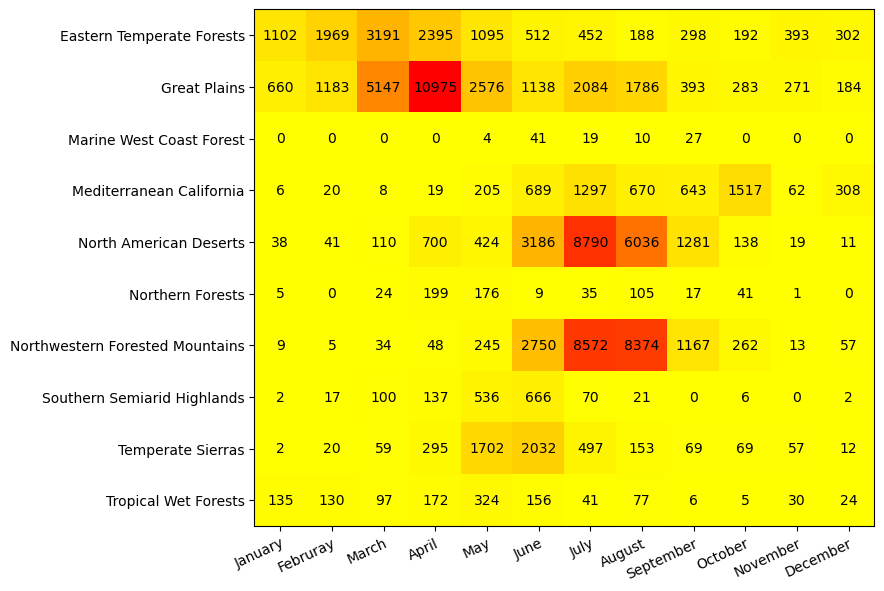

In [31]:
fig, ax = plt.subplots()
fig, ax
im = ax.imshow(data_array) 
im
fig.set_size_inches(8,8)
im = ax.imshow(data_array, cmap="autumn_r" )
im

# Show all tick marks on the x and y axis.
ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(ecos)))

# Label the x and y axis with the respective list entries.
ax.set_xticklabels(months)
ax.set_yticklabels(ecos)

# # Divide the acres burned by 1000 so the numbers fit better on the chart
data_formatted = []
for list_item in data:
    formatted_row = [round(x/1000) for x in list_item]
    data_formatted.append(formatted_row)
    
#data_formatted

#create a NumPy array from the data_formatted list
data_array = np.array(data_formatted)
#print(data_array)
plt.setp(ax.get_xticklabels(), rotation= 25 ,   #define the rotation
                               ha="right",
                               rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ecos)):
   for j in range(len(months)):
        text = ax.text(j, i, data_array[i, j],
                       ha="center", va="center"  , color= "black")
                       

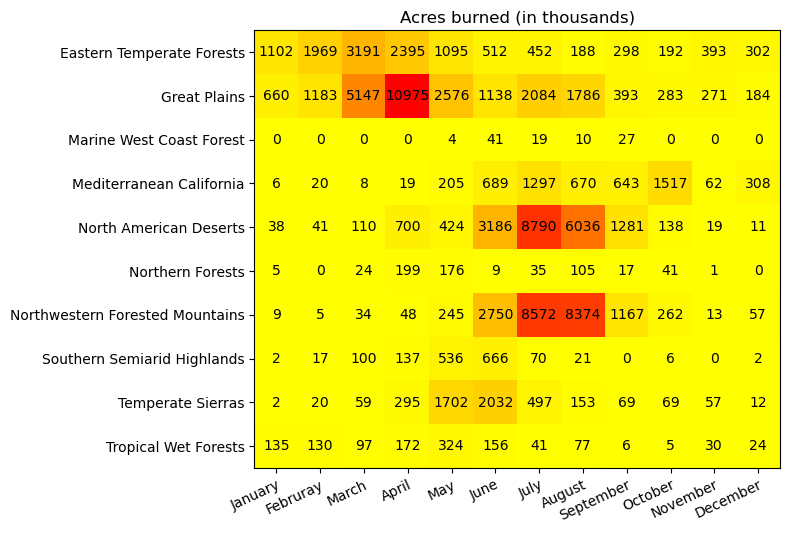

In [21]:
# Create the chart item with the custom properties
fig, ax = plt.subplots()
im = ax.imshow(data_array)
fig.set_size_inches(8,8)
im = ax.imshow(data_array, cmap="autumn_r" )

# Show all tick marks on the x and y axis.
ax.set_xticks(np.arange(len(months)))
ax.set_yticks(np.arange(len(ecos)))

# Label the x and y axis with the respective list entries.
ax.set_xticklabels(months)
ax.set_yticklabels(ecos)

# # Divide the acres burned by 1000 so the numbers fit better on the chart
data_formatted = []
for list_item in data:
    formatted_row = [round(x/1000) for x in list_item]
    data_formatted.append(formatted_row)

#create a NumPy array from the data_formatted list
data_array = np.array(data_formatted)
plt.setp(ax.get_xticklabels(), rotation= 25 ,   #define the rotation
                               ha="right",
                               rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ecos)):
   for j in range(len(months)):
        text = ax.text(j, i, data_array[i, j],
                       ha="center", va="center"  , color= "black")
                       

# Add a chart title and plot with a tight layout
ax.set_title("Acres burned (in thousands)" )
fig.tight_layout()
plt.show()